In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as  mae
from sklearn.metrics import mean_squared_error as mse
from itertools import combinations
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import random
import seaborn as sb

# Entrainement sur des données journalieres

In [2]:
EnamMekjr= pd.read_excel(r'EnamMksJr.xlsx')
AnamBerkaneJr= pd.read_excel(r'AnamBerkaneJr.xlsx')

In [3]:
random.seed(7)

# 1er Scénario

**Entrainemet et validation sur des données de Meknès et le test par les données de Berkan**

**4 Variables**

In [4]:
ytrain=EnamMekjr["ETP quotidien [mm]"].astype('int')
Xtrain=EnamMekjr.drop(columns=['ETP quotidien [mm]','Date/heure','Precipitation Somme','Unnamed: 0'])
ytest=AnamBerkaneJr['ETP quotidien [mm]']
Xtest=AnamBerkaneJr.drop(columns=['ETP quotidien [mm]','Date/heure','Precipitation Somme','Vitesse Max max','Unnamed: 0'])

In [5]:
model=keras.Sequential([
        keras.layers.Dense(93,activation='relu'),
        keras.layers.Dense(77,activation='relu'),

        keras.layers.Dense(1,activation='linear'),
    ])
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
history=model.fit(Xtrain,ytrain,epochs=200,verbose=0)

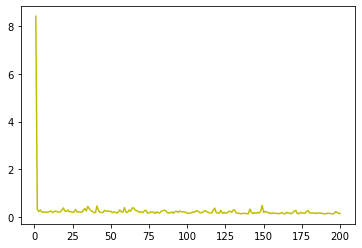

In [6]:
loss=history.history['loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')

In [7]:
ypred=model.predict(Xtest)

In [8]:
print("R2 = ",r2_score(ytest,ypred))
print("Mae = ",mae(ytest,ypred))
print("Mse = ",mse(ytest,ypred))
rmse = mse(ytest,ypred,squared=False)
print("Rmse",rmse)

R2 =  0.8866494978523144
Mae =  0.41653897377053767
Mse =  0.23601270966236107
Rmse 0.485811393096499


**3 variables**

In [9]:
temp=['Température moy', 'Température max', 'Température min']
hum=['Humidité moy', 'Humidité max', 'Humidité min']
VitVent=['Vitesse du vent  moy', 'Vitesse du vent  max']
Ray=['Rayonnement solaire moy']
comb = combinations([temp, hum, VitVent,Ray], 3)
co=list(comb)

In [10]:
_3varscoreR2={}
_3varscoreMae={}
_3varscoreMse={}
_3varscoreRMse={}
for a in range(0,len(co)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in co[a] :
        for x in i: 
            xtr.insert(0,x,Xtrain[x])
            xts.insert(0,x,Xtest[x])
    model=keras.Sequential([
    keras.layers.Dense(93,activation='relu'),
    keras.layers.Dense(77,activation='relu'),
    keras.layers.Dense(1,activation='linear'), ])
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
    history=model.fit(xtr,ytrain,epochs=200,verbose=0)
    ypred=model.predict(xts)
    scoreR2=r2_score(ytest,ypred)
    scoreMae=mae(ytest,ypred)
    scoreMse=mse(ytest,ypred)
    scoreRmse = mse(ytest,ypred,squared=False)
    
    var=''
    for col in xtr.columns:
        var+=col+','
    _3varscoreR2[var]=scoreR2
    _3varscoreMae[var]=scoreMae
    _3varscoreMse[var]=scoreMse
    _3varscoreRMse[var]=scoreRmse
    print("R2",scoreR2)
    print("Mae",scoreMae)
    print("Mse",scoreMse)
    print("Rmse",scoreRmse)
    print("------")

R2 0.5921079862373186
Mae 0.6073242324114929
Mse 0.8492922183294722
Rmse 0.9215705172852874
------
R2 0.9203122233263882
Mae 0.26366850657172203
Mse 0.1659218772158939
Rmse 0.4073350920506284
------
R2 0.8388676392572565
Mae 0.4978379279800547
Mse 0.33550169035545324
Rmse 0.5792250774573329
------
R2 0.8276895753897584
Mae 0.451476379231073
Mse 0.35877609225188106
Rmse 0.5989792085305474
------


In [11]:
_3varscoreR2

{'Vitesse du vent  max,Vitesse du vent  moy,Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,': 0.5921079862373186,
 'Rayonnement solaire moy,Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,': 0.9203122233263882,
 'Rayonnement solaire moy,Vitesse du vent  max,Vitesse du vent  moy,Température min,Température max,Température moy,': 0.8388676392572565,
 'Rayonnement solaire moy,Vitesse du vent  max,Vitesse du vent  moy,Humidité min,Humidité max,Humidité moy,': 0.8276895753897584}

In [12]:
_3varscoreR2['Vitesse du vent & Humidité & Température'] = _3varscoreR2.pop('Vitesse du vent  max,Vitesse du vent  moy,Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,')
_3varscoreR2['Rayonnement & Humidité & Température'] = _3varscoreR2.pop('Rayonnement solaire moy,Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,')
_3varscoreR2['Rayonnement & Vitesse du vent & Température'] = _3varscoreR2.pop('Rayonnement solaire moy,Vitesse du vent  max,Vitesse du vent  moy,Température min,Température max,Température moy,')
_3varscoreR2['Rayonnement & Vitesse du vent & Humidité'] = _3varscoreR2.pop('Rayonnement solaire moy,Vitesse du vent  max,Vitesse du vent  moy,Humidité min,Humidité max,Humidité moy,')

In [15]:
Variables = list(_3varscoreR2.keys())
ScoresR2 = list(_3varscoreR2.values())
ScoreMae=list(_3varscoreMae.values())
ScoreMse=list(_3varscoreMse.values())
ScoreRmse=list(_3varscoreRMse.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [16]:
print("La meilleur combinaison pour trois variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Mae",ScoreMae[index])
print("Mse",ScoreMse[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour trois variables est: Rayonnement & Humidité & Température
R2 0.9203122233263882
Mae 0.26366850657172203
Mse 0.1659218772158939
Rmse 0.4073350920506284


**2Variables**

In [17]:
comb = combinations([temp, hum, VitVent,Ray], 2)
co=list(comb)

In [18]:
_2varscoreR2={}
_2varscoreMae={}
_2varscoreMse={}
_2varscoreRMse={}
for a in range(0,len(co)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in co[a] :
        for x in i: 
            xtr.insert(0,x,Xtrain[x])
            xts.insert(0,x,Xtest[x])
    model=keras.Sequential([
    keras.layers.Dense(93,activation='relu'),
    keras.layers.Dense(77,activation='relu'),
    keras.layers.Dense(1,activation='linear'), ])
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
    history=model.fit(xtr,ytrain,epochs=200,verbose=0)
    ypred=model.predict(xts)
    scoreR2=r2_score(ytest,ypred)
    scoreMae=mae(ytest,ypred)
    scoreMse=mse(ytest,ypred)
    scoreRmse = mse(ytest,ypred,squared=False)
    
    var=''
    for col in xtr.columns:
        var+=col+','
    _2varscoreR2[var]=scoreR2
    _2varscoreMae[var]=scoreMae
    _2varscoreMse[var]=scoreMse
    _2varscoreRMse[var]=scoreRmse
    print("R2",scoreR2)
    print("Mae",scoreMae)
    print("Mse",scoreMse)
    print("Rmse",scoreRmse)
    print("------")

R2 0.7551602933582764
Mae 0.5679066862632979
Mse 0.5097929122727811
Rmse 0.713997837722763
------
R2 0.5875988799828691
Mae 0.740913304408056
Mse 0.8586808523902334
Rmse 0.9266503398748815
------
R2 0.8257028354494849
Mae 0.48340596839988637
Mse 0.3629127821457421
Rmse 0.6024224283223045
------
R2 -0.0880166495041379
Mae 1.1709724492120865
Mse 2.265413498324569
Rmse 1.5051290636767893
------
R2 0.5623907831383961
Mae 0.797903044558554
Mse 0.9111678826986098
Rmse 0.9545511420026743
------
R2 0.8195375397644842
Mae 0.46777907336090846
Mse 0.37574985046848164
Rmse 0.612984380281
------


In [19]:
_2varscoreR2['Humidité & Température'] = _2varscoreR2.pop('Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,')
_2varscoreR2['Vitesse du vent & Température'] = _2varscoreR2.pop('Vitesse du vent  max,Vitesse du vent  moy,Température min,Température max,Température moy,')
_2varscoreR2['Rayonnement & Température'] = _2varscoreR2.pop('Rayonnement solaire moy,Température min,Température max,Température moy,')
_2varscoreR2['Vitesse du vent & Humidité'] = _2varscoreR2.pop('Vitesse du vent  max,Vitesse du vent  moy,Humidité min,Humidité max,Humidité moy,')
_2varscoreR2['Rayonnement & Humidité'] = _2varscoreR2.pop('Rayonnement solaire moy,Humidité min,Humidité max,Humidité moy,')
_2varscoreR2['Rayonnement & Vitesse du vent'] = _2varscoreR2.pop('Rayonnement solaire moy,Vitesse du vent  max,Vitesse du vent  moy,')

In [20]:
Variables = list(_2varscoreR2.keys())
ScoresR2 = list(_2varscoreR2.values())
ScoreMae=list(_2varscoreMae.values())
ScoreMse=list(_2varscoreMse.values())
ScoreRmse=list(_2varscoreRMse.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [21]:
print("La meilleur combinaison pour deux variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Mae",ScoreMae[index])
print("Mse",ScoreMse[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour deux variables est: Rayonnement & Température
R2 0.8257028354494849
Mae 0.48340596839988637
Mse 0.3629127821457421
Rmse 0.6024224283223045


**1 Variable**

In [22]:
comb = combinations([temp, hum, VitVent,Ray], 1)
co=list(comb)

In [23]:
_1varscoreR2={}
_1varscoreMae={}
_1varscoreMse={}
_1varscoreRMse={}
for a in range(0,len(co)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in co[a] :
        for x in i: 
            xtr.insert(0,x,Xtrain[x])
            xts.insert(0,x,Xtest[x])
    model=keras.Sequential([
    keras.layers.Dense(93,activation='relu'),
    keras.layers.Dense(77,activation='relu'),
    keras.layers.Dense(1,activation='linear'), ])
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
    history=model.fit(xtr,ytrain,epochs=200,verbose=0)
    ypred=model.predict(xts)
    scoreR2=r2_score(ytest,ypred)
    scoreMae=mae(ytest,ypred)
    scoreMse=mse(ytest,ypred)
    scoreRmse = mse(ytest,ypred,squared=False)
    
    var=''
    for col in xtr.columns:
        var+=col+','
    _1varscoreR2[var]=scoreR2
    _1varscoreMae[var]=scoreMae
    _1varscoreMse[var]=scoreMse
    _1varscoreRMse[var]=scoreRmse
    print("R2",scoreR2)
    print("Mae",scoreMae)
    print("Mse",scoreMse)
    print("Rmse",scoreRmse)
    print("------")

R2 0.7153128350814006
Mae 0.6015827395423212
Mse 0.5927612840302355
Rmse 0.7699099194257959
------
R2 -0.010356084815032585
Mae 1.1390740285014116
Mse 2.1037125798557303
Rmse 1.4504180707146923
------
R2 -1.0012177010911478
Mae 1.4176181302431883
Mse 4.166834758644662
Rmse 2.041282625861657
------
R2 0.7948389767929034
Mae 0.5086577495880362
Mse 0.4271759549959617
Rmse 0.6535869911465204
------


In [24]:
_1varscoreR2['Température'] = _1varscoreR2.pop('Température min,Température max,Température moy,')
_1varscoreR2['Humidité'] = _1varscoreR2.pop('Humidité min,Humidité max,Humidité moy,')
_1varscoreR2['Vitesse du vent'] = _1varscoreR2.pop('Vitesse du vent  max,Vitesse du vent  moy,')
_1varscoreR2['Rayonnement'] = _1varscoreR2.pop( 'Rayonnement solaire moy,')

In [25]:
Variables = list(_1varscoreR2.keys())
ScoresR2 = list(_1varscoreR2.values())
ScoreMae=list(_1varscoreMae.values())
ScoreMse=list(_1varscoreMse.values())
ScoreRmse=list(_1varscoreRMse.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [26]:
print("La meilleur combinaison pour Une variable est:",Variables[index])
print("R2",ScoresR2[index])
print("Mae",ScoreMae[index])
print("Mse",ScoreMse[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour Une variable est: Rayonnement
R2 0.7948389767929034
Mae 0.5086577495880362
Mse 0.4271759549959617
Rmse 0.6535869911465204


# 2éme scénario

**Entrainemet et validation sur des données de Meknès et le test par les données de Berkan**

In [27]:
data=pd.concat([EnamMekjr,AnamBerkaneJr],axis=0,join='inner')

In [28]:
data=data.drop(columns=['Date/heure','Precipitation Somme','Unnamed: 0'])

In [29]:
y=data.iloc[:,-1]
X=data.drop(columns=['ETP quotidien [mm]'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4Variables**

In [31]:
model=keras.Sequential([
        keras.layers.Dense(93,activation='relu'),
        keras.layers.Dense(77,activation='relu'),

        keras.layers.Dense(1,activation='linear'),
    ])
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
history=model.fit(X_train,y_train,validation_split=0.2,epochs=100,verbose=0)

Text(0.5, 0, 'Loss')

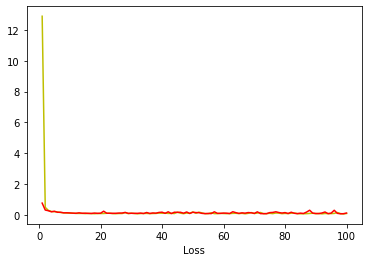

In [32]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')

In [33]:
ypred=model.predict(X_test)

In [37]:
print("R2 = ",r2_score(y_test,ypred))
print("Mae = ",mae(y_test,ypred))
print("Mse = ",mse(y_test,ypred))
rmse = mse(y_test,ypred,squared=False)
print("Rmse",rmse)

R2 =  0.9629901824350021
Mae =  0.23507473085336622
Mse =  0.0908771535858889
Rmse 0.3014583778664791


**3 variables**

In [38]:
temp=['Température moy', 'Température max', 'Température min']
hum=['Humidité moy', 'Humidité max', 'Humidité min']
VitVent=['Vitesse du vent  moy', 'Vitesse du vent  max']
Ray=['Rayonnement solaire moy']
comb = combinations([temp, hum, VitVent,Ray], 3)
co=list(comb)

In [40]:
V2_3varscoreR2={} #VERSION 2 3 VARIABLES
V2_3varscoreMae={}
V2_3varscoreMse={}
V2_3varscoreRMse={}
for a in range(0,len(co)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in co[a] :
        for x in i: 
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
    model=keras.Sequential([
    keras.layers.Dense(93,activation='relu'),
    keras.layers.Dense(77,activation='relu'),
    keras.layers.Dense(1,activation='linear'), ])
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
    history=model.fit(xtr,y_train,epochs=200,verbose=0)
    ypred=model.predict(xts)
    scoreR2=r2_score(y_test,ypred)
    scoreMae=mae(y_test,ypred)
    scoreMse=mse(y_test,ypred)
    scoreRmse = mse(y_test,ypred,squared=False)
    
    var=''
    for col in xtr.columns:
        var+=col+','
    V2_3varscoreR2[var]=scoreR2
    V2_3varscoreMae[var]=scoreMae
    V2_3varscoreMse[var]=scoreMse
    V2_3varscoreRMse[var]=scoreRmse
    print("R2",scoreR2)
    print("Mae",scoreMae)
    print("Mse",scoreMse)
    print("Rmse",scoreRmse)
    print("------")

R2 0.8619611348374115
Mae 0.45614983906411827
Mse 0.3389527421520287
Rmse 0.5821964807107896
------
R2 0.9562761719140483
Mae 0.2229895824269884
Mse 0.10736332415991082
Rmse 0.3276634312215979
------
R2 0.9758333958454977
Mae 0.2014909804057164
Mse 0.05934080041170311
Rmse 0.24359967243759403
------
R2 0.922415069573587
Mae 0.3485116640473627
Mse 0.19050884609006682
Rmse 0.43647319057425144
------


In [41]:
V2_3varscoreR2['Vitesse du vent & Humidité & Température'] = V2_3varscoreR2.pop('Vitesse du vent  max,Vitesse du vent  moy,Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,')
V2_3varscoreR2['Rayonnement & Humidité & Température'] = V2_3varscoreR2.pop('Rayonnement solaire moy,Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,')
V2_3varscoreR2['Rayonnement & Vitesse du vent & Température'] = V2_3varscoreR2.pop('Rayonnement solaire moy,Vitesse du vent  max,Vitesse du vent  moy,Température min,Température max,Température moy,')
V2_3varscoreR2['Rayonnement & Vitesse du vent & Humidité'] = V2_3varscoreR2.pop('Rayonnement solaire moy,Vitesse du vent  max,Vitesse du vent  moy,Humidité min,Humidité max,Humidité moy,')


In [42]:
Variables = list(V2_3varscoreR2.keys())
ScoresR2 = list(V2_3varscoreR2.values())
ScoreMae=list(V2_3varscoreMae.values())
ScoreMse=list(V2_3varscoreMse.values())
ScoreRmse=list(V2_3varscoreRMse.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [43]:
print("La meilleur combinaison pour trois variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Mae",ScoreMae[index])
print("Mse",ScoreMse[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour trois variables est: Rayonnement & Vitesse du vent & Température
R2 0.9758333958454977
Mae 0.2014909804057164
Mse 0.05934080041170311
Rmse 0.24359967243759403


**2 VARIABLES**

In [44]:
comb = combinations([temp, hum, VitVent,Ray], 2)
co=list(comb)

In [45]:
V2_2varscoreR2={}
V2_2varscoreMae={}
V2_2varscoreMse={}
V2_2varscoreRMse={}
for a in range(0,len(co)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in co[a] :
        for x in i: 
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
    model=keras.Sequential([
    keras.layers.Dense(93,activation='relu'),
    keras.layers.Dense(77,activation='relu'),
    keras.layers.Dense(1,activation='linear'), ])
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
    history=model.fit(xtr,y_train,epochs=200,verbose=0)
    ypred=model.predict(xts)
    scoreR2=r2_score(y_test,ypred)
    scoreMae=mae(y_test,ypred)
    scoreMse=mse(y_test,ypred)
    scoreRmse = mse(y_test,ypred,squared=False)
    
    var=''
    for col in xtr.columns:
        var+=col+','
    V2_2varscoreR2[var]=scoreR2
    V2_2varscoreMae[var]=scoreMae
    V2_2varscoreMse[var]=scoreMse
    V2_2varscoreRMse[var]=scoreRmse
    print("R2",scoreR2)
    print("Mae",scoreMae)
    print("Mse",scoreMse)
    print("Rmse",scoreRmse)
    print("------")

R2 0.8044634896395243
Mae 0.5257203184305482
Mse 0.4801375054732374
Rmse 0.6929195519490249
------
R2 0.8501238217771029
Mae 0.4699066107440146
Mse 0.3680191193406399
Rmse 0.606645793969298
------
R2 0.9298166795270542
Mae 0.29608368483033903
Mse 0.1723342835339892
Rmse 0.41513164602808733
------
R2 0.4798692505317873
Mae 0.9185915483316038
Mse 1.277174682667716
Rmse 1.1301215344677384
------
R2 0.9062738211705906
Mae 0.3610667826073944
Mse 0.230143483780753
Rmse 0.4797327211904072
------
R2 0.834026733562828
Mae 0.4783172298388876
Mse 0.407545322228972
Rmse 0.6383927648626447
------


In [46]:
V2_2varscoreR2['Humidité & Température'] = V2_2varscoreR2.pop('Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,')
V2_2varscoreR2['Vitesse du vent & Température'] = V2_2varscoreR2.pop('Vitesse du vent  max,Vitesse du vent  moy,Température min,Température max,Température moy,')
V2_2varscoreR2['Rayonnement & Température'] = V2_2varscoreR2.pop('Rayonnement solaire moy,Température min,Température max,Température moy,')
V2_2varscoreR2['Vitesse du vent & Humidité'] = V2_2varscoreR2.pop('Vitesse du vent  max,Vitesse du vent  moy,Humidité min,Humidité max,Humidité moy,')
V2_2varscoreR2['Rayonnement & Humidité'] = V2_2varscoreR2.pop('Rayonnement solaire moy,Humidité min,Humidité max,Humidité moy,')
V2_2varscoreR2['Rayonnement & Vitesse du vent'] = V2_2varscoreR2.pop('Rayonnement solaire moy,Vitesse du vent  max,Vitesse du vent  moy,')

In [47]:
Variables = list(V2_2varscoreR2.keys())
ScoresR2 = list(V2_2varscoreR2.values())
ScoreMae=list(V2_2varscoreMae.values())
ScoreMse=list(V2_2varscoreMse.values())
ScoreRmse=list(V2_2varscoreRMse.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [48]:
print("La meilleur combinaison pour DEUX variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Mae",ScoreMae[index])
print("Mse",ScoreMse[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour DEUX variables est: Rayonnement & Température
R2 0.9298166795270542
Mae 0.29608368483033903
Mse 0.1723342835339892
Rmse 0.41513164602808733


**1 VARIABLES**

In [49]:
comb = combinations([temp, hum, VitVent,Ray], 1)
co=list(comb)

In [50]:
V2_1varscoreR2={}
V2_1varscoreMae={}
V2_1varscoreMse={}
V2_1varscoreRMse={}
for a in range(0,len(co)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in co[a] :
        for x in i: 
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
    model=keras.Sequential([
    keras.layers.Dense(93,activation='relu'),
    keras.layers.Dense(77,activation='relu'),
    keras.layers.Dense(1,activation='linear'), ])
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
    history=model.fit(xtr,y_train,epochs=200,verbose=0)
    ypred=model.predict(xts)
    scoreR2=r2_score(y_test,ypred)
    scoreMae=mae(y_test,ypred)
    scoreMse=mse(y_test,ypred)
    scoreRmse = mse(y_test,ypred,squared=False)
    
    var=''
    for col in xtr.columns:
        var+=col+','
    V2_1varscoreR2[var]=scoreR2
    V2_1varscoreMae[var]=scoreMae
    V2_1varscoreMse[var]=scoreMse
    V2_1varscoreRMse[var]=scoreRmse
    print("R2",scoreR2)
    print("Mae",scoreMae)
    print("Mse",scoreMse)
    print("Rmse",scoreRmse)
    print("------")

R2 0.7943370451362355
Mae 0.5492732441539218
Mse 0.5050028658816794
Rmse 0.7106355366020471
------
R2 0.4143995772724193
Mae 0.9727165820302478
Mse 1.4379346632204568
Rmse 1.1991391342210698
------
R2 0.2079472660231091
Mae 1.1433698405410833
Mse 1.9448757840356348
Rmse 1.3945880338062688
------
R2 0.8293716494946993
Mae 0.4823479721880263
Mse 0.4189758241240866
Rmse 0.6472834187000982
------


In [51]:
V2_1varscoreR2['Température'] = V2_1varscoreR2.pop('Température min,Température max,Température moy,')
V2_1varscoreR2['Humidité'] = V2_1varscoreR2.pop('Humidité min,Humidité max,Humidité moy,')
V2_1varscoreR2['Vitesse du vent'] = V2_1varscoreR2.pop('Vitesse du vent  max,Vitesse du vent  moy,')
V2_1varscoreR2['Rayonnement'] = V2_1varscoreR2.pop( 'Rayonnement solaire moy,')

In [52]:
Variables = list(V2_1varscoreR2.keys())
ScoresR2 = list(V2_1varscoreR2.values())
ScoreMae=list(V2_1varscoreMae.values())
ScoreMse=list(V2_1varscoreMse.values())
ScoreRmse=list(V2_1varscoreRMse.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [53]:
print("La meilleur combinaison pour Une variable est:",Variables[index])
print("R2",ScoresR2[index])
print("Mae",ScoreMae[index])
print("Mse",ScoreMse[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour Une variable est: Rayonnement
R2 0.8293716494946993
Mae 0.4823479721880263
Mse 0.4189758241240866
Rmse 0.6472834187000982


# Entrainement sur des données horraires

In [4]:
#chargement des données néttoyées
EnamMksHr= pd.read_excel(r'EnamHorraire.xlsx')

In [5]:
Data=EnamMksHr.drop(columns=['Date/heure','ETP quotidien','ET Daily calculé','Unnamed: 0'])

In [15]:
Data

,Température moy,Température max,Température min,Radiation Solaire moy,Humidité moy,Humidité max,Humidité min,Vitesse du vent moy,Vitesse du vent max,ET Horraire
0,21.48,21.75,21.19,492,54.12,55.69,52.13,3.2,3.6,2
1,22.09,22.71,21.57,569,49.92,53.24,46.81,3.3,3.8,2
2,22.89,23.27,22.27,591,38.55,46.10,36.25,2.6,3.3,2
3,21.51,22.63,20.26,539,40.15,44.02,36.64,2.2,2.8,2
4,18.49,20.02,17.01,424,47.76,50.90,43.80,1.8,2.3,1
...,...,...,...,...,...,...,...,...,...,...
34933,24.12,24.17,24.08,0,58.62,58.71,58.51,0.0,0.0,0
34934,24.22,24.29,24.15,0,58.38,58.51,58.29,0.0,0.0,0
34935,24.33,24.39,24.25,0,58.10,58.26,57.90,0.0,0.0,0
34936,24.46,24.51,24.43,0,57.95,58.04,57.90,0.0,0.0,0


In [6]:
Y=Data['ET Horraire']
X=Data.drop(columns=['ET Horraire'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Entrainement sur 4 variables

**XGBoost**

In [8]:
model=keras.Sequential([
        keras.layers.Dense(93,activation='relu'),
        keras.layers.Dense(77,activation='relu'),

        keras.layers.Dense(1,activation='linear'),
    ])
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
history=model.fit(X_train,y_train,validation_split=0.2,epochs=100,verbose=0)

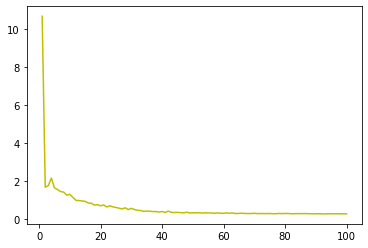

In [9]:
loss=history.history['loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')

In [10]:
ypred=model.predict(X_test)

In [11]:
print("R2 = ",r2_score(y_test,ypred))
print("Mae = ",mae(y_test,ypred))
print("Mse = ",mse(y_test,ypred))
rmse = mse(y_test,ypred,squared=False)
print("Rmse",rmse)

R2 =  0.9683841293993174
Mae =  0.281711534180025
Mse =  0.32091580022003613
Rmse 0.5664943073147657


**3 Variables**

In [21]:
#creation des combinaisons de trois variables
temp=['Température moy', 'Température max', 'Température min']
hum=['Humidité moy', 'Humidité max', 'Humidité min']
VitVent=['Vitesse du vent moy', 'Vitesse du vent max']
Ray=['Radiation Solaire moy']
comb = combinations([temp, hum, VitVent,Ray], 3)
co3v=list(comb)

In [22]:
HR_3varscoreR2={}
HR_3varscoreMae={}
HR_3varscoreMse={}
HR_3varscoreRMse={}
for a in range(0,len(co3v)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in co3v[a] :
        for x in i: 
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
    model=keras.Sequential([
    keras.layers.Dense(93,activation='relu'),
    keras.layers.Dense(77,activation='relu'),
    keras.layers.Dense(1,activation='linear'), ])
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
    history=model.fit(xtr,y_train,epochs=200,verbose=0)
    ypred=model.predict(xts)
    scoreR2=r2_score(y_test,ypred)
    scoreMae=mae(y_test,ypred)
    scoreMse=mse(y_test,ypred)
    scoreRmse = mse(y_test,ypred,squared=False)
    
    var=''
    for col in xtr.columns:
        var+=col+','
    HR_3varscoreR2[var]=scoreR2
    HR_3varscoreMae[var]=scoreMae
    HR_3varscoreMse[var]=scoreMse
    HR_3varscoreRMse[var]=scoreRmse
    print("R2",scoreR2)
    print("Mae",scoreMae)
    print("Mse",scoreMse)
    print("Rmse",scoreRmse)
    print("------")

R2 0.7719169137895027
Mae 0.8664269469730097
Mse 2.315149471997046
Rmse 1.521561524223403
------
R2 0.9743796472291808
Mae 0.26708460916980703
Mse 0.2600585040093615
Rmse 0.5099593160335062
------
R2 0.954858840635995
Mae 0.3282469785637372
Mse 0.45820377566471526
Rmse 0.6769075089439585
------
R2 0.9098148902998832
Mae 0.49112802339654743
Mse 0.915420834456473
Rmse 0.9567762718924802
------


In [23]:
HR_3varscoreR2

{'Vitesse du vent max,Vitesse du vent moy,Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,': 0.7719169137895027,
 'Radiation Solaire moy,Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,': 0.9743796472291808,
 'Radiation Solaire moy,Vitesse du vent max,Vitesse du vent moy,Température min,Température max,Température moy,': 0.954858840635995,
 'Radiation Solaire moy,Vitesse du vent max,Vitesse du vent moy,Humidité min,Humidité max,Humidité moy,': 0.9098148902998832}

In [25]:
HR_3varscoreR2['Vitesse du vent & Humidité & Température'] = HR_3varscoreR2.pop('Vitesse du vent max,Vitesse du vent moy,Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,')
HR_3varscoreR2['Rayonnement & Humidité & Température'] = HR_3varscoreR2.pop('Radiation Solaire moy,Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,')
HR_3varscoreR2['Rayonnement & Vitesse du vent & Température'] = HR_3varscoreR2.pop('Radiation Solaire moy,Vitesse du vent max,Vitesse du vent moy,Température min,Température max,Température moy,')
HR_3varscoreR2['Rayonnement & Vitesse du vent & Humidité'] = HR_3varscoreR2.pop('Radiation Solaire moy,Vitesse du vent max,Vitesse du vent moy,Humidité min,Humidité max,Humidité moy,')

In [26]:
Variables = list(HR_3varscoreR2.keys())
ScoresR2 = list(HR_3varscoreR2.values())
ScoreMae=list(HR_3varscoreMae.values())
ScoreMse=list(HR_3varscoreMse.values())
ScoreRmse=list(HR_3varscoreRMse.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [27]:
print("La meilleur combinaison pour trois variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Mae",ScoreMae[index])
print("Mse",ScoreMse[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour trois variables est: Rayonnement & Humidité & Température
R2 0.9743796472291808
Mae 0.26708460916980703
Mse 0.2600585040093615
Rmse 0.5099593160335062


**2Variables**

In [29]:
#CREATION DES COMBINAISON DE DEUX VARIABLES
comb = combinations([temp, hum, VitVent,Ray], 2)
co2v=list(comb)

In [30]:
HR_2varscoreR2={}
HR_2varscoreMae={}
HR_2varscoreMse={}
HR_2varscoreRMse={}
for a in range(0,len(co2v)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in co2v[a] :
        for x in i: 
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
    model=keras.Sequential([
    keras.layers.Dense(93,activation='relu'),
    keras.layers.Dense(77,activation='relu'),
    keras.layers.Dense(1,activation='linear'), ])
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
    history=model.fit(xtr,y_train,epochs=200,verbose=0)
    ypred=model.predict(xts)
    scoreR2=r2_score(y_test,ypred)
    scoreMae=mae(y_test,ypred)
    scoreMse=mse(y_test,ypred)
    scoreRmse = mse(y_test,ypred,squared=False)
    
    var=''
    for col in xtr.columns:
        var+=col+','
    HR_2varscoreR2[var]=scoreR2
    HR_2varscoreMae[var]=scoreMae
    HR_2varscoreMse[var]=scoreMse
    HR_2varscoreRMse[var]=scoreRmse
    print("R2",scoreR2)
    print("Mae",scoreMae)
    print("Mse",scoreMse)
    print("Rmse",scoreRmse)
    print("------")

R2 0.7427760963084065
Mae 0.9149559637801423
Mse 2.6109423311951128
Rmse 1.6158410600040811
------
R2 0.7312669508522753
Mae 0.9641431719478275
Mse 2.727765513784409
Rmse 1.6515948394761983
------
R2 0.9538225347538598
Mae 0.3506006142830497
Mse 0.4687227626519331
Rmse 0.6846333052459054
------
R2 0.5267270537934208
Mae 1.3618074598332022
Mse 4.803940659192201
Rmse 2.1917893738204413
------
R2 0.9054395865150076
Mae 0.5181341336275946
Mse 0.9598322040835618
Rmse 0.9797102653762294
------
R2 0.8932622773225538
Mae 0.521207750624196
Mse 1.0834375595514167
Rmse 1.0408830671845022
------


In [32]:
HR_2varscoreR2

{'Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,': 0.7427760963084065,
 'Vitesse du vent max,Vitesse du vent moy,Température min,Température max,Température moy,': 0.7312669508522753,
 'Radiation Solaire moy,Température min,Température max,Température moy,': 0.9538225347538598,
 'Vitesse du vent max,Vitesse du vent moy,Humidité min,Humidité max,Humidité moy,': 0.5267270537934208,
 'Radiation Solaire moy,Humidité min,Humidité max,Humidité moy,': 0.9054395865150076,
 'Radiation Solaire moy,Vitesse du vent max,Vitesse du vent moy,': 0.8932622773225538}

In [33]:
HR_2varscoreR2['Température & Humidité'] = HR_2varscoreR2.pop('Humidité min,Humidité max,Humidité moy,Température min,Température max,Température moy,')
HR_2varscoreR2['Température & Vitesse du vent'] = HR_2varscoreR2.pop('Vitesse du vent max,Vitesse du vent moy,Température min,Température max,Température moy,')
HR_2varscoreR2['Température & Rayonnement'] = HR_2varscoreR2.pop('Radiation Solaire moy,Température min,Température max,Température moy,')
HR_2varscoreR2['Humidité & Vitesse du vent'] = HR_2varscoreR2.pop('Vitesse du vent max,Vitesse du vent moy,Humidité min,Humidité max,Humidité moy,')
HR_2varscoreR2['Rayonnement & Humidité'] = HR_2varscoreR2.pop('Radiation Solaire moy,Humidité min,Humidité max,Humidité moy,')
HR_2varscoreR2['Rayonnement & Vitesse du vent'] = HR_2varscoreR2.pop('Radiation Solaire moy,Vitesse du vent max,Vitesse du vent moy,')

In [34]:
Variables = list(HR_2varscoreR2.keys())
ScoresR2 = list(HR_2varscoreR2.values())
ScoreMae=list(HR_2varscoreMae.values())
ScoreMse=list(HR_2varscoreMse.values())
ScoreRmse=list(HR_2varscoreRMse.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [35]:
print("La meilleur combinaison pour deux variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Mae",ScoreMae[index])
print("Mse",ScoreMse[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour deux variables est: Température & Rayonnement
R2 0.9538225347538598
Mae 0.3506006142830497
Mse 0.4687227626519331
Rmse 0.6846333052459054


**1 Variable**

In [36]:
comb = combinations([temp, hum, VitVent,Ray], 1)
co1v=list(comb)

In [38]:
HR_1varscoreR2={}
HR_1varscoreMae={}
HR_1varscoreMse={}
HR_1varscoreRMse={}
for a in range(0,len(co1v)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in co1v[a] :
        for x in i: 
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
    model=keras.Sequential([
    keras.layers.Dense(93,activation='relu'),
    keras.layers.Dense(77,activation='relu'),
    keras.layers.Dense(1,activation='linear'), ])
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
    history=model.fit(xtr,y_train,epochs=200,verbose=0)
    ypred=model.predict(xts)
    scoreR2=r2_score(y_test,ypred)
    scoreMae=mae(y_test,ypred)
    scoreMse=mse(y_test,ypred)
    scoreRmse = mse(y_test,ypred,squared=False)
    
    var=''
    for col in xtr.columns:
        var+=col+','
    HR_1varscoreR2[var]=scoreR2
    HR_1varscoreMae[var]=scoreMae
    HR_1varscoreMse[var]=scoreMse
    HR_1varscoreRMse[var]=scoreRmse
    print("R2",scoreR2)
    print("Mae",scoreMae)
    print("Mse",scoreMse)
    print("Rmse",scoreRmse)
    print("------")

R2 0.6552364859306818
Mae 1.0953963499170536
Mse 3.4995101163476465
Rmse 1.8706977618919756
------
R2 0.4423385908403451
Mae 1.4833303476248425
Mse 5.660522831480711
Rmse 2.3791853293681666
------
R2 0.36728496924213716
Mae 1.6586718381743584
Mse 6.422352019701157
Rmse 2.5342359834279753
------
R2 0.8881327085716763
Mae 0.5403591478170774
Mse 1.135505069608724
Rmse 1.0656008021809689
------


In [39]:
HR_1varscoreR2

{'Température min,Température max,Température moy,': 0.6552364859306818,
 'Humidité min,Humidité max,Humidité moy,': 0.4423385908403451,
 'Vitesse du vent max,Vitesse du vent moy,': 0.36728496924213716,
 'Radiation Solaire moy,': 0.8881327085716763}

In [40]:
HR_1varscoreR2['Température'] = HR_1varscoreR2.pop('Température min,Température max,Température moy,')
HR_1varscoreR2['Humidité'] = HR_1varscoreR2.pop('Humidité min,Humidité max,Humidité moy,')
HR_1varscoreR2['Vitesse du vent'] = HR_1varscoreR2.pop('Vitesse du vent max,Vitesse du vent moy,')
HR_1varscoreR2['Rayonnement'] = HR_1varscoreR2.pop( 'Radiation Solaire moy,')

In [41]:
Variables = list(HR_1varscoreR2.keys())
ScoresR2 = list(HR_1varscoreR2.values())
ScoreMae=list(HR_1varscoreMae.values())
ScoreMse=list(HR_1varscoreMse.values())
ScoreRmse=list(HR_1varscoreRMse.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [42]:
print("La meilleur combinaison pour Une variable est:",Variables[index])
print("R2",ScoresR2[index])
print("Mae",ScoreMae[index])
print("Mse",ScoreMse[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour Une variable est: Rayonnement
R2 0.8881327085716763
Mae 0.5403591478170774
Mse 1.135505069608724
Rmse 1.0656008021809689
